# Python notebook used to tune the model for the Higgs Boson Challenge

#### EPFL - Machine Learning - Autumn 2019

## 1) Header

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from proj1_helpers import *
from implementations import *
from helpers import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Randomisation

In [2]:
seed=374534
np.random.seed(seed)

## 2) Data loading

In [5]:
DATA_TRAIN_PATH = '../Data/train.csv' # TODO: download train data and supply path here 
DATA_TEST_PATH = '../Data/test.csv' # TODO: download train data and supply path here 

y_train_raw, x_train_raw, ids_train_raw = load_csv_data(DATA_TRAIN_PATH,sub_sample=True)
_, x_test_raw, ids_test_raw = load_csv_data(DATA_TEST_PATH)

In [6]:
y_train = np.copy(y_train_raw)
x_train = np.copy(x_train_raw)
ids_train = np.copy(ids_train_raw)
x_test = np.copy(x_test_raw)
ids_test = np.copy(ids_test_raw)

print("The dimensions of x_train are ",x_train.shape)
print("The dimension of y_train is ",y_train.shape)
print("The dimension of ids_train is ",ids_train.shape, "\n")
print("The dimensions of x_test are ",x_test.shape)
print("The dimension of ids_test is ",ids_test.shape)

The dimensions of x_train are  (5000, 30)
The dimension of y_train is  (5000,)
The dimension of ids_train is  (5000,) 

The dimensions of x_test are  (568238, 30)
The dimension of ids_test is  (568238,)


## 3) Functions needed to perform the model tuning

Skip to part 4) for the actual model tuning

In [22]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold cross-validation."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]
    return np.array(k_indices)

def cross_validation(y, x, k_indices, k, lambda_, degrees, method, initial_w, max_iters, gamma):
    """return the accuracy of given method."""
    y_test=y[k_indices[k,:]]
    x_test=x[k_indices[k,:]]   
    y_train=np.delete(y,k)
    x_train=np.delete(x,k,0)
    
    y_pred_train, y_pred_test = prediction(x_train, y_train, x_test, degrees, method, initial_w, max_iters, gamma, lambda_)
    
    accuracy_train, F1_train = check_accuracy(y_pred_train, y_train)
    accuracy_test, F1_test = check_accuracy(y_pred_test, y_test)
    return accuracy_train, accuracy_test, F1_train, F1_test

def cross_validation_visualization(lambdas, acc_tr, acc_te, f1_tr, f1_te):
    """visualization of the accuracy and the f1 score for the train data and the test data."""
    fig = plt.figure()
    fig.set_size_inches(12,4)
    ax_acc = fig.add_subplot(1, 2, 1)
    ax_f1 = fig.add_subplot(1, 2, 2)
    
    ax_acc.set_xlabel('lambda')
    ax_acc.set_ylabel('accuracy')
    ax_acc.semilogx(lambdas, acc_tr, marker=".", color='b', label='train accuracy')
    ax_acc.semilogx(lambdas, acc_te, marker=".", color='r', label='test accuracy')
    ax_acc.set_title('Accuracy')           
    ax_acc.grid(True)
    ax_acc.legend(loc=2)
    
    ax_f1.set_xlabel('lambda')
    ax_f1.set_ylabel('f1 score')
    ax_f1.semilogx(lambdas, f1_tr, marker=".", color='b', label='train f1 score')
    ax_f1.semilogx(lambdas, f1_te, marker=".", color='r', label='test f1 score')
    ax_f1.set_title('F1 score')           
    ax_f1.grid(True)
    ax_f1.legend(loc=2)
    
    fig.savefig('cross_validation')


def cross_validation_demo(y, x, k_fold, lambdas, degrees,seed=1, method="RLR", initial_w=None,
               max_iters=10000, gamma=1e-10):
    """to do"""
    k_indices = build_k_indices(y, k_fold,seed)
    acc_tr = []
    acc_te = []
    f1_tr = []
    f1_te = []
    for lambda_ in lambdas:
        acc_tr_lambda=0;
        acc_te_lambda=0;
        f1_tr_lambda=0;
        f1_te_lambda=0;
        for k in range(k_fold):
            accuracy_train, accuracy_test, f1_train, f1_test = cross_validation(y, x, k_indices, k, lambda_, degrees, method, initial_w, max_iters, gamma)
            
            acc_tr_lambda += accuracy_train/k_fold
            acc_te_lambda += accuracy_test/k_fold
            f1_tr_lambda += f1_train/k_fold
            f1_te_lambda += f1_test/k_fold
            
        acc_tr.append(acc_tr_lambda)
        acc_te.append(acc_te_lambda)
        f1_tr.append(f1_tr_lambda)
        f1_te.append(f1_te_lambda)
       
    cross_validation_visualization(lambdas, acc_tr, acc_te, f1_tr, f1_te)



## 4) Data preprocessing

In [23]:
y_train, x_train, ids_train = data_preprocessing(y_train, x_train, ids_train,"mean")
_, x_test, ids_test = data_preprocessing(_, x_test, ids_test,"mean")

print("The dimensions of x_train are ",x_train.shape)
print("The dimension of y_train is ",y_train.shape)
print("The dimension of ids_train is ",ids_train.shape, "\n")
print("The dimensions of x_test are ",x_test.shape)
print("The dimension of ids_test is ",ids_test.shape)


The dimensions of x_train are  (5000, 30)
The dimension of y_train is  (5000,)
The dimension of ids_train is  (5000,) 

The dimensions of x_test are  (568238, 30)
The dimension of ids_test is  (568238,)


## 5) Model tuning

Current iteration=0, loss=3465.042755619167
Current iteration=1000, loss=3451.333543959664
Current iteration=2000, loss=3449.670104820748
Current iteration=3000, loss=3449.0309818277606
Current iteration=4000, loss=3448.7106380060613
Current iteration=5000, loss=3448.5170833410757
Current iteration=6000, loss=3448.380817283923
Current iteration=7000, loss=3448.272791022628
Current iteration=8000, loss=3448.1797655212713
Current iteration=9000, loss=3448.0953504686217
Current iteration=10000, loss=3448.0163302085493
Current iteration=11000, loss=3447.9410307409808
Current iteration=12000, loss=3447.868551842032
Current iteration=13000, loss=3447.798391168664
Current iteration=14000, loss=3447.73025481004
Current iteration=15000, loss=3447.6639597487774
Current iteration=16000, loss=3447.599382844988
Current iteration=17000, loss=3447.5364338372783
Current iteration=18000, loss=3447.475040925501
Current iteration=19000, loss=3447.4151430172537
Current iteration=20000, loss=3447.356685532

Current iteration=68000, loss=3445.5917133339694
Current iteration=69000, loss=3445.567939782236
Current iteration=70000, loss=3445.5444737840057
Current iteration=71000, loss=3445.5213072903625
Current iteration=72000, loss=3445.4984325131977
Current iteration=73000, loss=3445.47584191543
Current iteration=74000, loss=3445.453528201632
Current iteration=75000, loss=3445.4314843090365
Current iteration=76000, loss=3445.4097033989133
Current iteration=77000, loss=3445.3881788482913
Current iteration=78000, loss=3445.366904242027
Current iteration=79000, loss=3445.3458733651887
Current iteration=80000, loss=3445.3250801957524
Current iteration=81000, loss=3445.3045188975952
Current iteration=82000, loss=3445.284183813768
Current iteration=83000, loss=3445.264069460048
Current iteration=84000, loss=3445.244170518741
Current iteration=85000, loss=3445.224481832738
Current iteration=86000, loss=3445.2049983998118
Current iteration=87000, loss=3445.1857153671363
Current iteration=88000, loss

Current iteration=33000, loss=3446.706932848302
Current iteration=34000, loss=3446.664271499016
Current iteration=35000, loss=3446.622480417607
Current iteration=36000, loss=3446.581531723498
Current iteration=37000, loss=3446.541398538634
Current iteration=38000, loss=3446.502054953091
Current iteration=39000, loss=3446.463475991336
Current iteration=40000, loss=3446.425637579211
Current iteration=41000, loss=3446.388516511667
Current iteration=42000, loss=3446.352090421294
Current iteration=43000, loss=3446.316337747681
Current iteration=44000, loss=3446.281237707626
Current iteration=45000, loss=3446.246770266216
Current iteration=46000, loss=3446.212916108778
Current iteration=47000, loss=3446.179656613722
Current iteration=48000, loss=3446.1469738262635
Current iteration=49000, loss=3446.114850433023
Current iteration=50000, loss=3446.083269737503
Current iteration=51000, loss=3446.052215636418
Current iteration=52000, loss=3446.0216725968753
Current iteration=53000, loss=3445.991

The train data accuracy of the model is  0.23504700940188036 
The train data f1 score of the model is  0.43615441722345955
Current iteration=0, loss=3465.042755619167
Current iteration=1000, loss=3451.3323476136593
Current iteration=2000, loss=3449.668600217126
Current iteration=3000, loss=3449.0293512008448
Current iteration=4000, loss=3448.708959281017
Current iteration=5000, loss=3448.5153955034943
Current iteration=6000, loss=3448.379141200923
Current iteration=7000, loss=3448.2711381570034
Current iteration=8000, loss=3448.1781421577675
Current iteration=9000, loss=3448.0937599467093
Current iteration=10000, loss=3448.0147741640076
Current iteration=11000, loss=3447.939509817924
Current iteration=12000, loss=3447.867066108677
Current iteration=13000, loss=3447.796940362527
Current iteration=14000, loss=3447.7288384831554
Current iteration=15000, loss=3447.662577353737
Current iteration=16000, loss=3447.598033785779
Current iteration=17000, loss=3447.5351174991224
Current iteration

Current iteration=65000, loss=3445.6651794112017
Current iteration=66000, loss=3445.6404150000953
Current iteration=67000, loss=3445.6159840987843
Current iteration=68000, loss=3445.5918778098085
Current iteration=69000, loss=3445.568087528526
Current iteration=70000, loss=3445.544604932027
Current iteration=71000, loss=3445.521421968503
Current iteration=72000, loss=3445.498530847048
Current iteration=73000, loss=3445.475924027878
Current iteration=74000, loss=3445.453594212954
Current iteration=75000, loss=3445.4315343369826
Current iteration=76000, loss=3445.4097375587876
Current iteration=77000, loss=3445.388197253033
Current iteration=78000, loss=3445.3669070022856
Current iteration=79000, loss=3445.345860589393
Current iteration=80000, loss=3445.325051990183
Current iteration=81000, loss=3445.304475366449
Current iteration=82000, loss=3445.2841250592232
Current iteration=83000, loss=3445.2639955823233
Current iteration=84000, loss=3445.2440816161543
Current iteration=85000, loss=

Current iteration=30000, loss=3446.8413746050996
Current iteration=31000, loss=3446.795899075138
Current iteration=32000, loss=3446.7513842139397
Current iteration=33000, loss=3446.7077989075283
Current iteration=34000, loss=3446.665113151754
Current iteration=35000, loss=3446.6232980161285
Current iteration=36000, loss=3446.582325608225
Current iteration=37000, loss=3446.542169038646
Current iteration=38000, loss=3446.5028023866103
Current iteration=39000, loss=3446.4642006661943
Current iteration=40000, loss=3446.4263397932905
Current iteration=41000, loss=3446.3891965533276
Current iteration=42000, loss=3446.352748569777
Current iteration=43000, loss=3446.3169742735
Current iteration=44000, loss=3446.2818528729345
Current iteration=45000, loss=3446.247364325157
Current iteration=46000, loss=3446.213489307825
Current iteration=47000, loss=3446.1802091919967
Current iteration=48000, loss=3446.147506015842
Current iteration=49000, loss=3446.115362459227
Current iteration=50000, loss=34

Current iteration=97000, loss=3445.002936322805
Current iteration=98000, loss=3444.985575263045
Current iteration=99000, loss=3444.9683663007686
The train data accuracy of the model is  0.23504700940188036 
The train data f1 score of the model is  0.4361544172234595


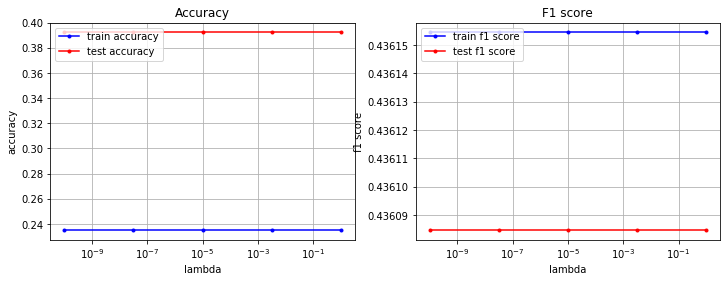

In [51]:
#degrees = [5,6,7,8,9,10]
degrees = [4]
k_fold = 2
lambdas = np.logspace(-10, 0, 5)

for degree in degrees:
    cross_validation_demo(y_train, x_train, k_fold, lambdas, degree, seed=154, method="RLR", initial_w=None, max_iters=100000, gamma=1e-30)

## 6) Prediction of the test data labels

In [53]:
degree=9
minusloglambda=2
lambda_=10**(-loglambda)

y_tr_pd, y_te_pd = prediction(x_train, y_train, x_test, degree, lambda_)
name="submission_{0}_{1}.csv".format(degree,minusloglambda)
create_csv_submission(ids_test, y_te_pd, name)

The train data accuracy of the model is  0.8246322341956133 
The train data f1 score of the model is  0.8158142260188426
